In [1]:
import sys, os
import numpy as np
import time
import math
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pupil_apriltags import Detector

# %matplotlib widget
%load_ext autoreload
%autoreload 2


In [2]:
at_detector = Detector(
   families="tag16h5",
   nthreads=1,
   quad_decimate=1.0,
   quad_sigma=0,
   refine_edges=1,
   decode_sharpening=0.25,
   debug=0
)


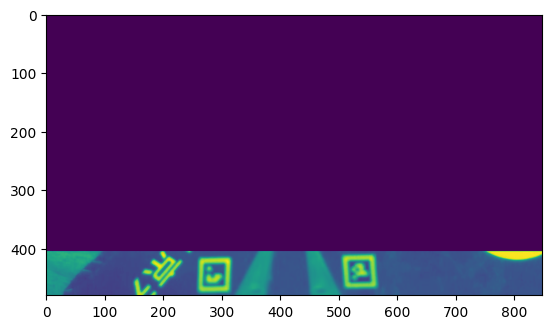

In [3]:
# data_path = "/home/zfei/codes/data/upi/rs435i_2024-08-22-09-17-13/"
data_path = "/home/zfei/data/UPI/rs435i_april_2024-08-26-03-38-10/"
data_path = "/home/zfei/data/UPI/rs435i_5mm_2024-08-27-02-17-41/"

color_img_idx = 20
color_img_path = os.path.join(data_path, f"color_{color_img_idx:06d}.png")
image_color = cv2.cvtColor(cv2.imread(color_img_path), cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image_color,cv2.COLOR_BGR2GRAY)
gray[0:405, :] = 0
# gray[0:360, :] = 0

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)


In [4]:
ret = at_detector.detect(gray)
print(len(ret))

1


In [5]:
ret[0]

Detection object:
tag_family = b'tag16h5'
tag_id = 0
hamming = 1
decision_margin = 45.47889709472656
homography = [[ -3.85609168 -23.91632204 287.81233471]
 [ 14.23400907  -8.59167554 445.25360756]
 [ -0.01064137  -0.01993227   1.        ]]
center = [287.81233471 445.25360756]
corners = [[270.26309204 426.38946533]
 [268.24102783 465.11624146]
 [305.03848267 463.77044678]
 [306.22241211 426.56948853]]
pose_R = None
pose_t = None
pose_err = None

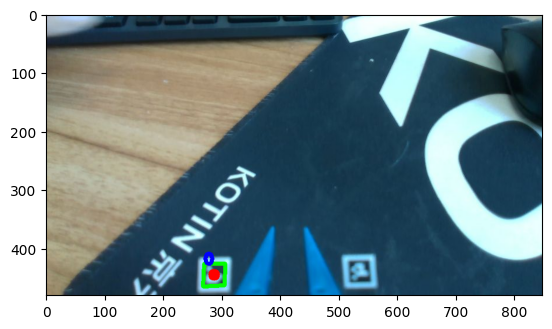

In [6]:
detect_plot = image_color.copy()
for tag in ret:
    for idx in range(len(tag.corners)):
        cv2.line(detect_plot, tuple(tag.corners[idx-1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), thickness=5)
        # plot center
        cv2.circle(detect_plot, (int(tag.center[0]), int(tag.center[1])), 10, (255, 0, 0), -1)
    cv2.putText(detect_plot, str(tag.tag_id), org=(tag.corners[0, 0].astype(int), tag.corners[0, 1].astype(int)), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.8, color=(0, 0, 255), thickness=5)
plt.imshow(detect_plot)